In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [2]:
import os 

In [9]:
df = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'homeprices.csv'))

In [11]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


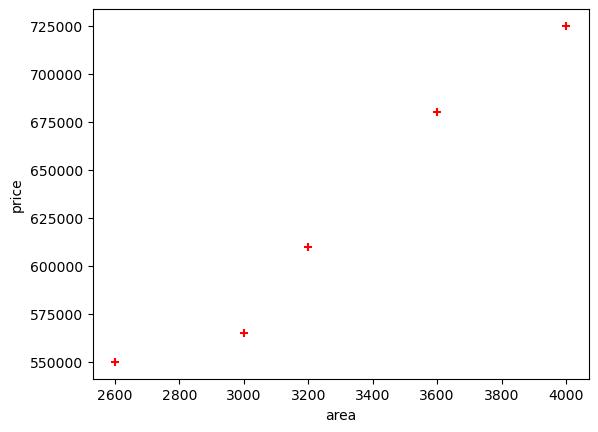

In [12]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

#### Getting the reg object

In [13]:
reg = linear_model.LinearRegression()

In [14]:
reg

LinearRegression()

In [24]:
type(df['area'])

pandas.core.series.Series

In [23]:
type(df.area)

pandas.core.series.Series

In [18]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
reg.fit(df[['area']], df.price)

LinearRegression()

In [29]:
reg.coef_

array([135.78767123])

In [31]:
reg.predict([[3300]])

C:\Users\Shubham_Rawat1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [32]:
# linear reg

m = reg.coef_
c = reg.intercept_
x = 3300
y = m * x + c

In [33]:
y

array([628715.75342466])

In [35]:
df_new = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'areas.csv'))

In [36]:
df_new.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [40]:
prediction = reg.predict(df_new)

In [41]:
prediction

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [42]:
df_new['prices'] = prediction

In [43]:
df_new.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [45]:
df_new.to_csv('output_price_prediction', index=False)

In [48]:
df.columns

Index(['area', 'price'], dtype='object')

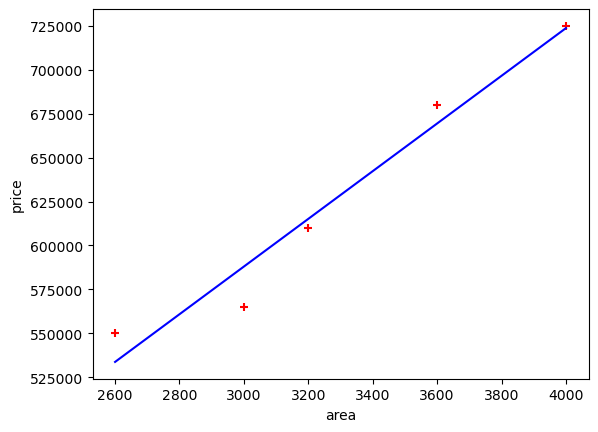

In [49]:
# lets visulatize the prediction line
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [50]:

# doing the learning regression analysis for per capita income prediction
# LR is used when we have to predict the contineous varibale 


In [53]:
### canada_per_capita_income.csv ( per capita income data )

df_income = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'canada_per_capita_income.csv'))

In [54]:
df_income.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [59]:
df_income['income'] = df_income['per capita income (US$)']

In [61]:
df_income.drop('per capita income (US$)', axis=1)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


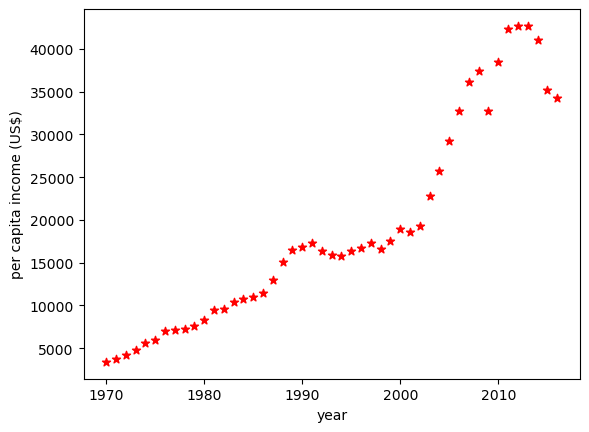

In [62]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df_income.year,df_income.income,color='red',marker='*')

In [57]:
df_income.count()

year                       47
per capita income (US$)    47
dtype: int64

In [63]:
reg = linear_model.LinearRegression()

In [67]:
type(df_income[['income']])

pandas.core.frame.DataFrame

In [69]:
reg.fit(df_income[['year']], df_income.income)

LinearRegression()

In [77]:
# prediction using the linear line
coef = reg.coef_

intercept = reg.intercept_

x = 2024

y = coef * x + intercept

y

array([44602.55439531])

In [78]:
# check it with model
p = reg.predict([[2024]])

C:\Users\Shubham_Rawat1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [79]:
p

array([44602.55439531])

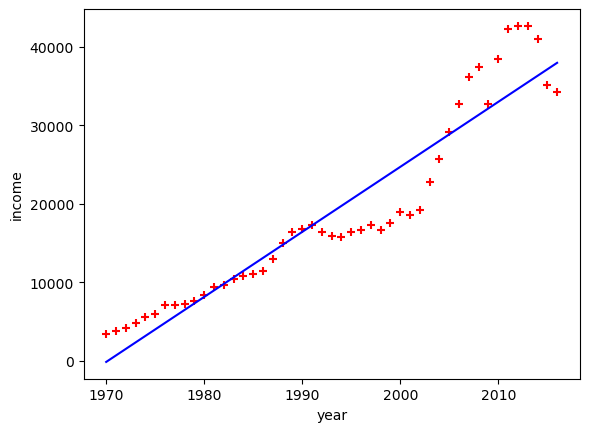

In [82]:
#lets saw it in the graph

# lets visulatize the prediction line
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df_income.year,df_income.income,color='red',marker='+')
plt.plot(df_income.year, reg.predict(df_income[['year']]), color='blue')